# EFFECTIVE STORY TELLING USING DATA VISUALIZATION

Brazil ecommerce dataset from Kaggle
"https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_classified_public_dataset.csv" 

Data on products purchased by customers, their location, value, reviews.


In [1]:
# Import the libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Read the dataset and print the info
data = pd.read_csv("data/brazil-product.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 34 columns):
Unnamed: 0                       3584 non-null int64
id                               3584 non-null int64
order_status                     3584 non-null object
order_products_value             3584 non-null float64
order_freight_value              3584 non-null float64
order_items_qty                  3584 non-null int64
order_sellers_qty                3584 non-null int64
order_purchase_timestamp         3584 non-null object
order_aproved_at                 3584 non-null object
order_estimated_delivery_date    3584 non-null object
order_delivered_customer_date    3467 non-null object
customer_city                    3584 non-null object
customer_state                   3584 non-null object
customer_zip_code_prefix         3584 non-null int64
product_category_name            3584 non-null object
product_name_lenght              3584 non-null int64
product_description_lenght       

In [3]:
# Convert date fields to datetime type
data.order_purchase_timestamp = pd.to_datetime(data.order_purchase_timestamp)
data.order_approved_at = pd.to_datetime(data.order_aproved_at)
data.order_estimated_delivery_date = pd.to_datetime(data.order_estimated_delivery_date)
data.order_delivered_customer_date = pd.to_datetime(data.order_delivered_customer_date)
data.review_creation_date = pd.to_datetime(data.review_score)
data.review_answer_timestamp = pd.to_datetime(data.review_answer_timestamp)

C:\Users\s28ki\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# Drop the unnecessary columns
data = data.drop(['Unnamed: 0', 'review_comment_title'], axis = 1)
data.head()

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,3,delivered,99.80,15.86,2,4,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,4,delivered,87.00,12.74,1,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,5,delivered,99.90,17.95,1,2,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


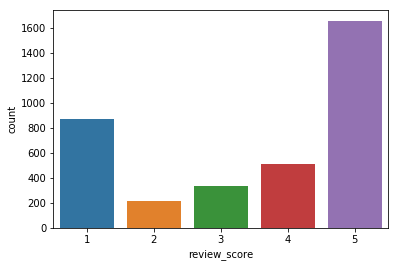

In [5]:
# Lets see how the users have rated the products
sns.countplot(data.review_score)
# Majority of the users have rated to 5 which shows that most of them are satisfied

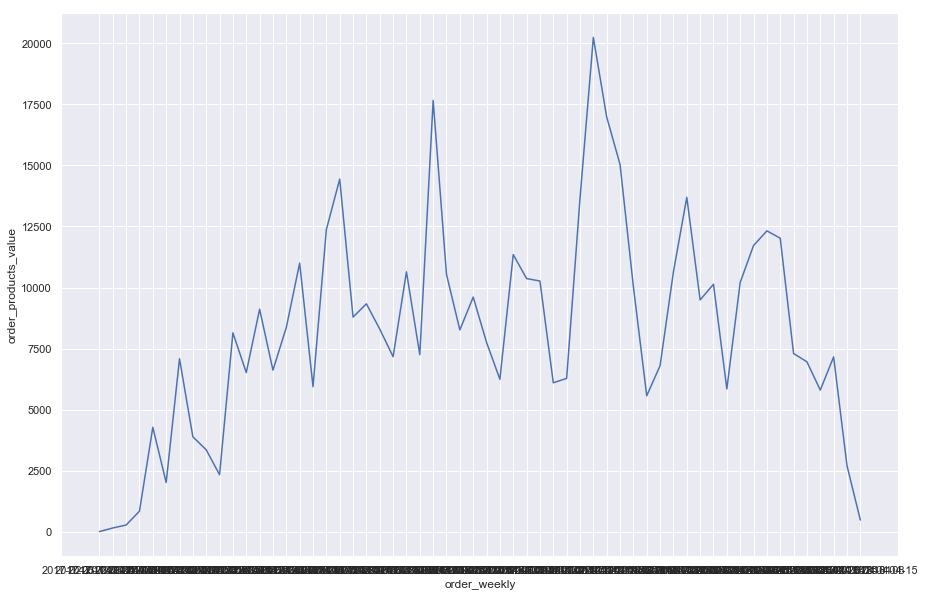

In [6]:
# We are interested what is the rate of weekly revenue?
data['order_weekly'] = data.order_purchase_timestamp.dt.to_period('W').astype('str')
grouped_df = data.groupby(['order_weekly']).order_products_value.sum()
grouped_df = grouped_df.to_frame()
grouped_df = grouped_df.reset_index()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x = grouped_df.order_weekly, y = grouped_df.order_products_value)

# From the graph there is periodic up and down, it is never uniform
# The usual range is 5000 to 12500 per week

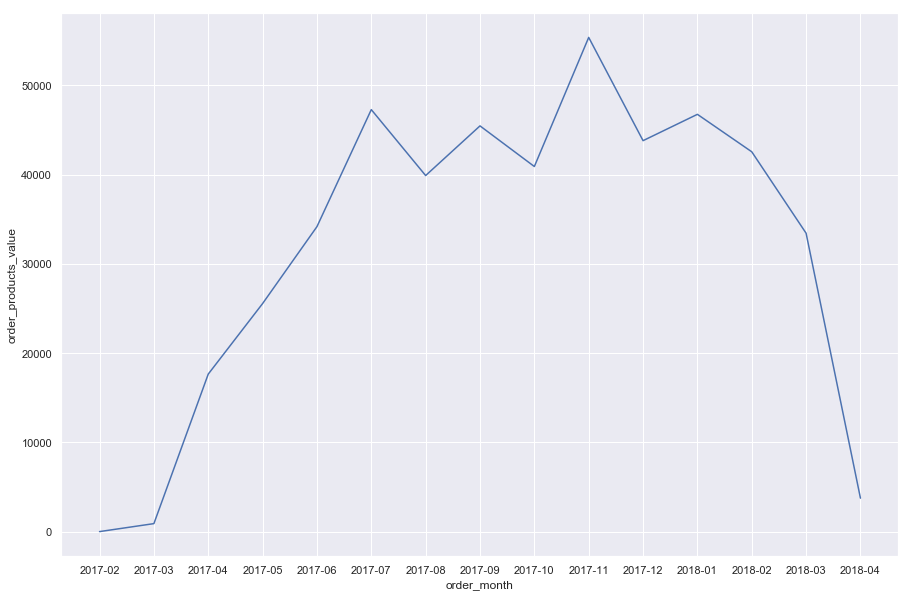

In [7]:
# We want to know which month had generated most revenue?
# From graph it is November 2017 - approximately 55000
data['order_month'] = data.order_purchase_timestamp.dt.to_period('M').astype('str')
grouped_df = data.groupby(['order_month']).order_products_value.sum()
grouped_df = grouped_df.to_frame()
grouped_df = grouped_df.reset_index()
sns.set(rc= {'figure.figsize':(15,10)})
sns.lineplot(x = 'order_month', y = 'order_products_value', data = grouped_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002794FCC3400>,
      dtype=object)

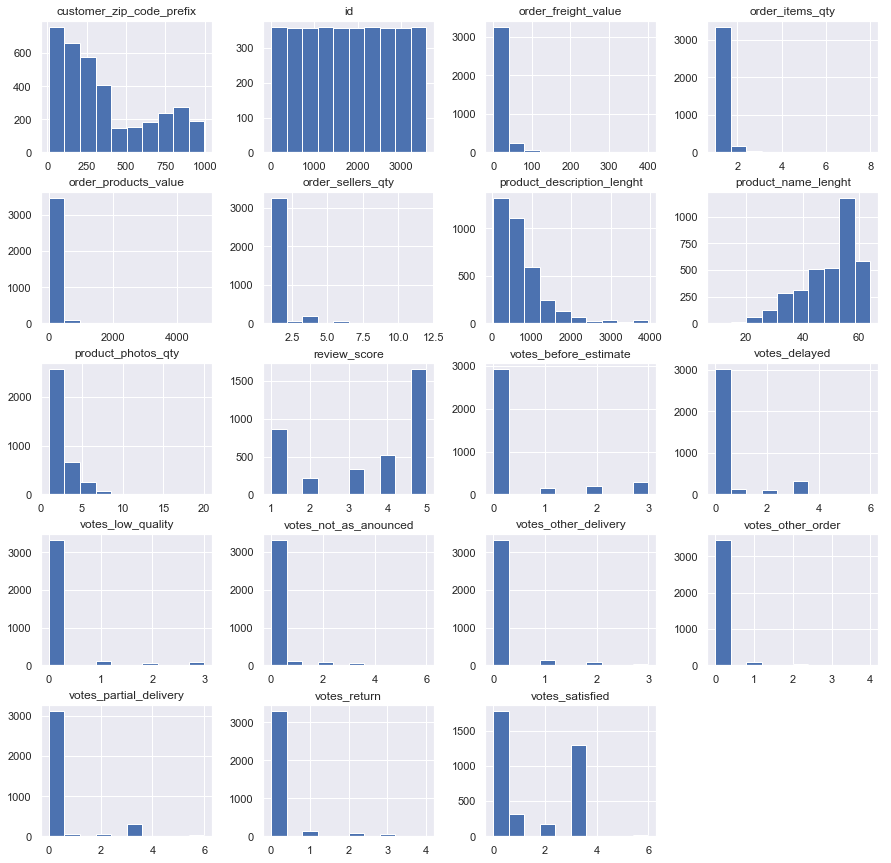

In [8]:
# We are interested in the distribution of all the variables
# Lets check the histogram of the dataset
data.hist(figsize = (15,15))

In [9]:
# Lets take only the numerical variables to check the relationship between any two variables
num_df = data.select_dtypes(include = [np.number])
num_df = num_df.drop(['id', 'customer_zip_code_prefix'], axis = 1)
votes_col = num_df.filter(like = 'votes')
num_df = num_df.drop(votes_col.columns, axis = 1)

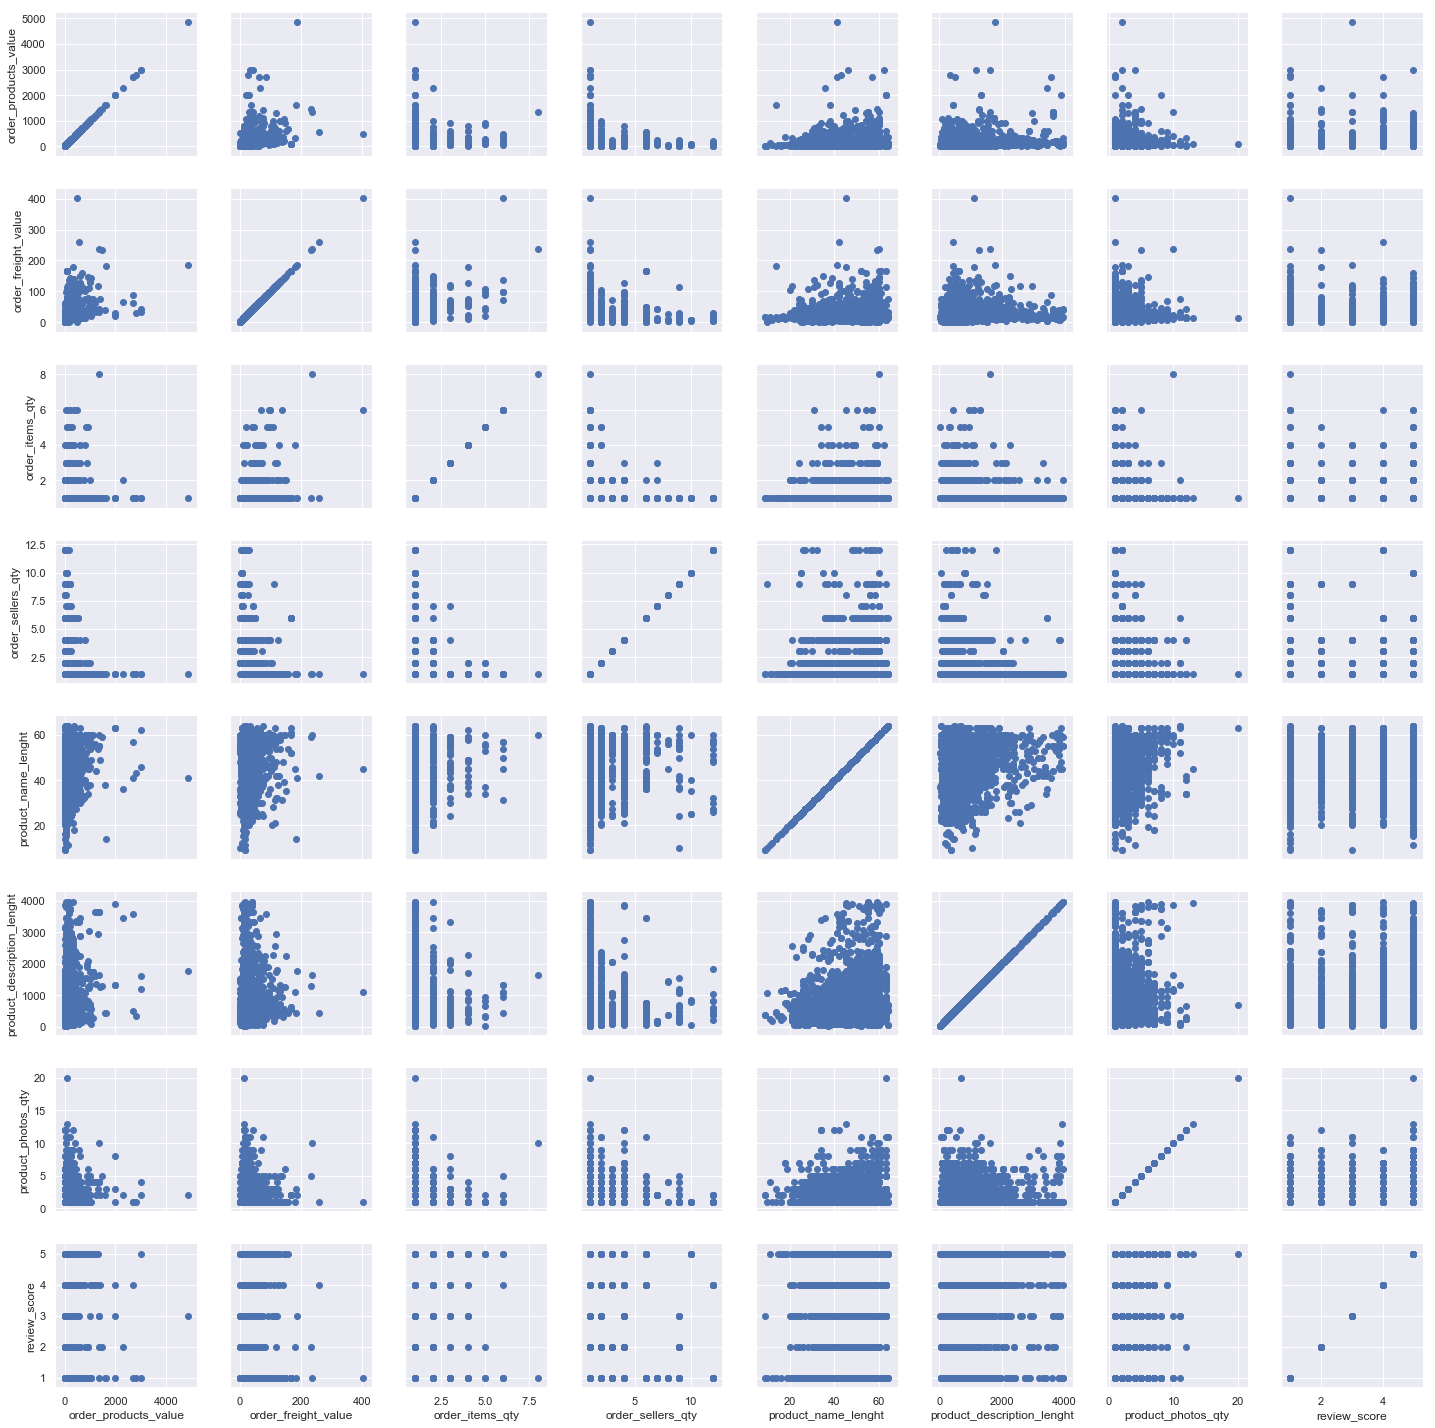

In [10]:
# Scatter plot tells the relationship between any two variables
g = sns.PairGrid(num_df)
g.map(plt.scatter)

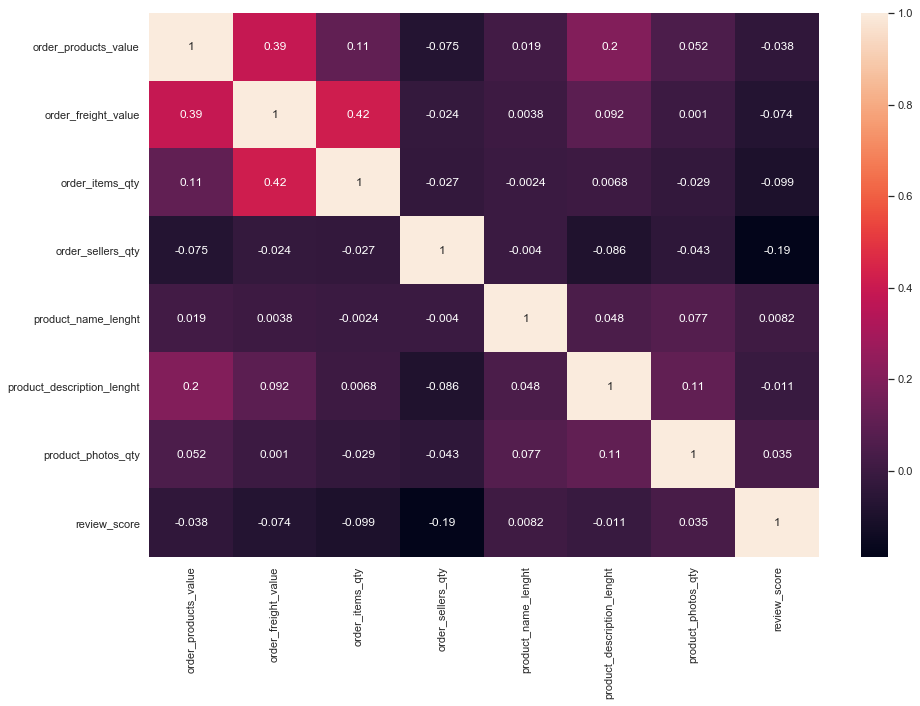

In [11]:
# Heatmap is another way of finding the relationship between two variables
# Correlation value ranges from -1 to +1
# -1 being strongly negatively correlated, +1 being strongly positively correlated, 0 shows there is no relation between them
correlation = num_df.corr()
sns.heatmap(correlation, annot = True)

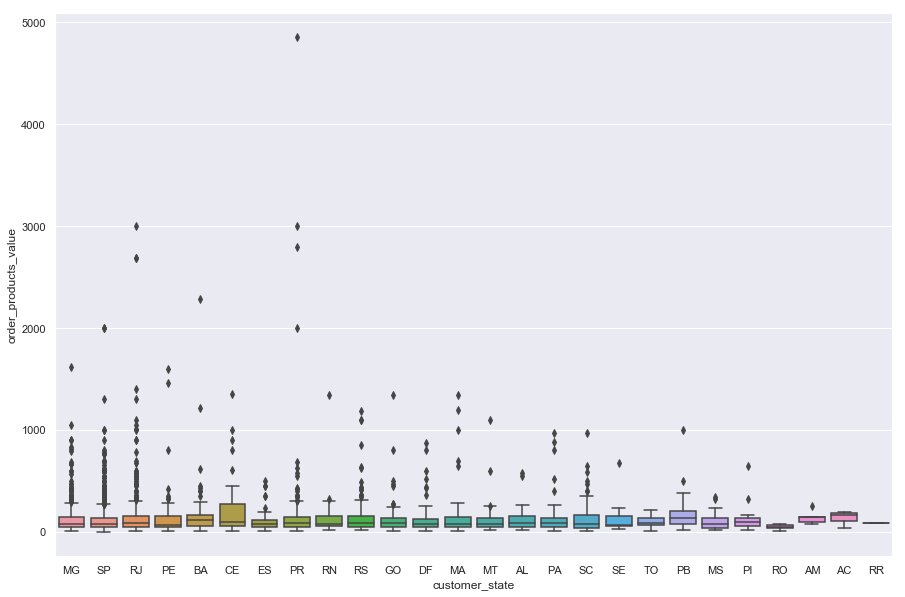

In [12]:
# This boxplot shows the range of revenue generated by each of the state
sns.boxplot(x = 'customer_state', y = 'order_products_value', data = data)

Text(0.5,1,'Product Review Score per category')

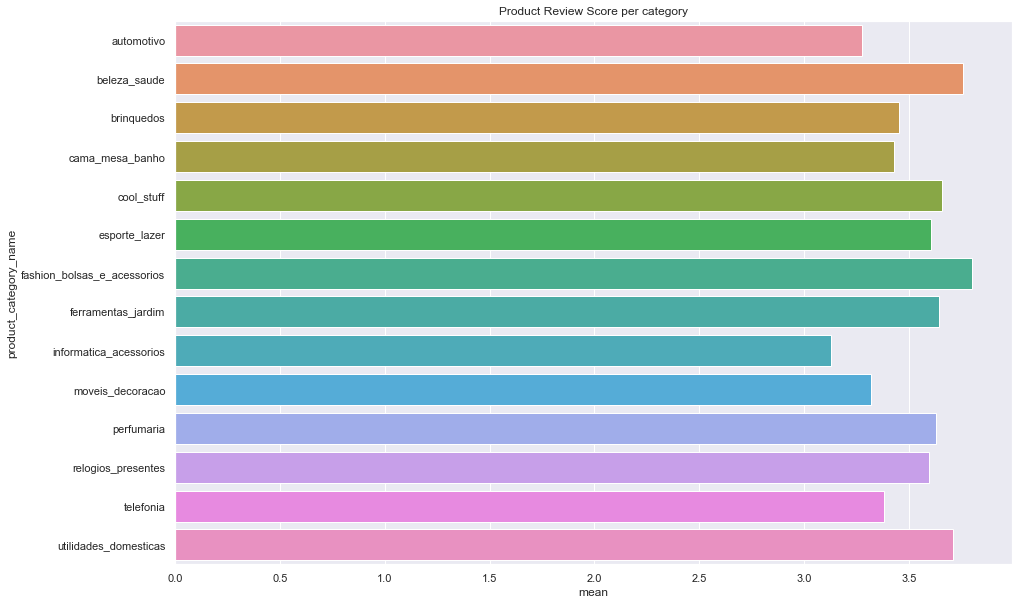

In [13]:
# This barplot shows which product category has highest review score
#
avg_score_df = data.groupby(['product_category_name']).agg(['count', 'mean']).review_score
avg_score_df = avg_score_df[avg_score_df['count'] > 100]
avg_score_df = avg_score_df.reset_index()
av = sns.barplot(x = 'mean', y = 'product_category_name', data = avg_score_df)
av.set_title("Product Review Score per category")

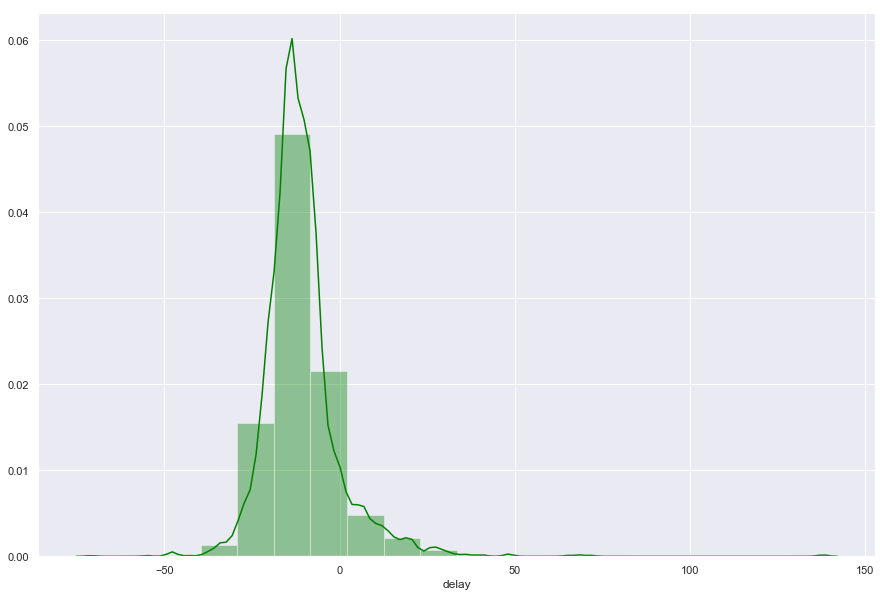

In [14]:
# Let's see what is the usual delay in delivery
# Looks like majority of the orders reach before the estimated delivery date
data['delay'] = data.order_delivered_customer_date.dt.date - data.order_estimated_delivery_date.dt.date
data['delay'] = data['delay'].astype('timedelta64[D]')
date_df = data[~data['delay'].isnull()]
sns.distplot(date_df['delay'], bins = 20, color = "green")

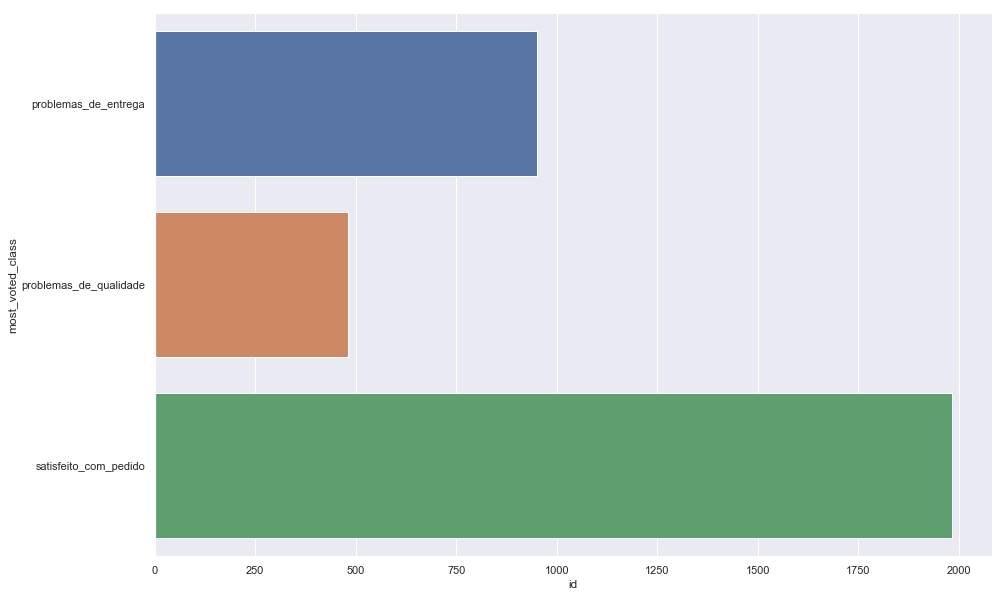

In [15]:
# Lets check on the most voted class
sclass = data.groupby(['most_voted_class']).id.count()
sclass = sclass.reset_index()
sns.barplot(x = 'id', y = 'most_voted_class', data = sclass)

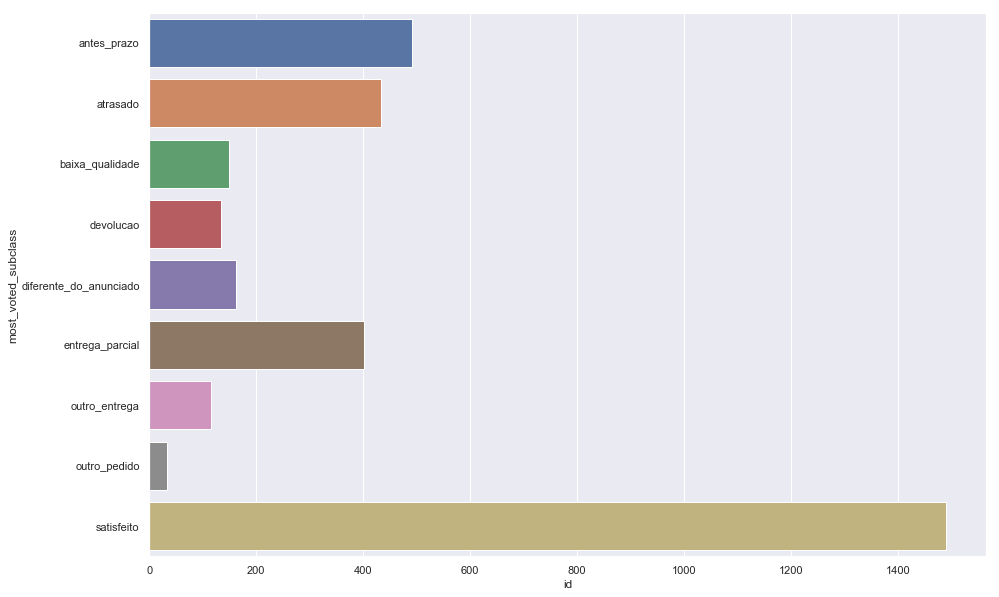

In [16]:
# The below plot shows the most voted subclasses
subclass = data.groupby(['most_voted_subclass']).id.count()
subclass = subclass.reset_index()
sns.barplot(x = 'id', y = 'most_voted_subclass', data = subclass)

# THANK YOU!!!